<a href="https://colab.research.google.com/github/RamaSrinivas7/Deep-Learning-Lab-Programs/blob/main/Copy_of_DL_Day_2_programs6%2C7%2C10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving WhatsApp Image 2025-07-04 at 21.58.19_f7ada77d.jpg to WhatsApp Image 2025-07-04 at 21.58.19_f7ada77d.jpg


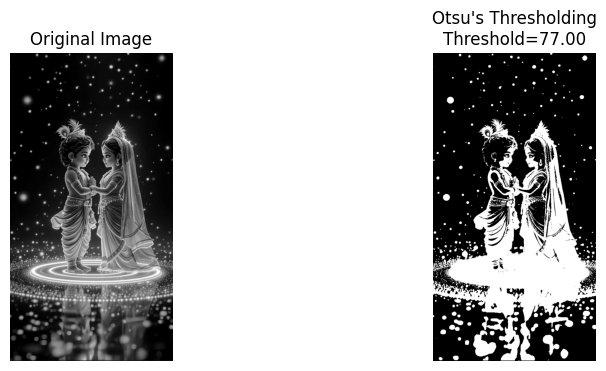

Otsu's Optimal Threshold Value: 77.0


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Upload image
uploaded = files.upload()  # This will prompt you to upload an image file

# Get the uploaded file name
image_path = list(uploaded.keys())[0]

# Load the uploaded image in grayscale
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if image is loaded
if img is None:
    raise FileNotFoundError("Image could not be loaded!")

# Apply Otsu's thresholding
ret, otsu_thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display original and thresholded images
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title(f"Otsu's Thresholding\nThreshold={ret:.2f}")
plt.imshow(otsu_thresh, cmap='gray')
plt.axis('off')

plt.show()

# Print threshold value
print("Otsu's Optimal Threshold Value:", ret)


Saving Screenshot 2025-10-16 092623.png to Screenshot 2025-10-16 092623.png


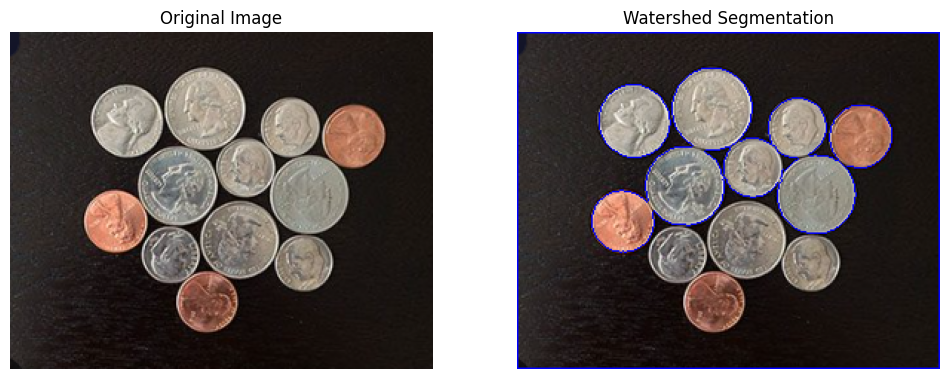

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Upload image
uploaded = files.upload()  # Upload your image file

# Get the uploaded file name
image_path = list(uploaded.keys())[0]

# Load image
img = cv2.imread(image_path)
original = img.copy()

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Noise removal using threshold + morphological operations
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Sure background area
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Sure foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)

# Unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Marker labeling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that background is not 0
markers = markers + 1

# Mark the unknown region as 0
markers[unknown==255] = 0

# Apply watershed
markers = cv2.watershed(img, markers)

# Mark boundaries in red
img[markers == -1] = [255, 0, 0]

# Display results
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Watershed Segmentation")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()


In [ ]:
import numpy as np
from sklearn.datasets import load_breast_cancer, load_iris
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load dataset (choose breast cancer or iris)
data = load_breast_cancer()  # or load_iris()
X = data.data
y = data.target

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict continuous outputs
y_pred_cont = model.predict(X_test)

# Convert to class labels via thresholding (0.5 threshold)
y_pred_class = (y_pred_cont >= 0.5).astype(int)

# Evaluate classification performance
accuracy = accuracy_score(y_test, y_pred_class)
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)
conf_matrix = confusion_matrix(y_test, y_pred_class)

print("Performance Evaluation of Linear Regression Classifier:\n")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)


Performance Evaluation of Linear Regression Classifier:

Accuracy: 0.9561
Precision: 0.9459
Recall: 0.9859
F1-score: 0.9655

Confusion Matrix:
[[39  4]
 [ 1 70]]
